In [1]:
import os
import json
import copy

# List result Files
experiment_files = [a for a in os.listdir("./out") if ".json" in a]

# Load result Files
all_experiments = []
for filename in experiment_files:
    with open("./out/{}".format(filename), "r") as f:
        all_experiments.append(json.load(f))

# Aglomerate similar results
unique_experiment_names = list(dict.fromkeys([a["model"] for a in all_experiments]))
print(unique_experiment_names)

sorted_experiments = {}
for e in unique_experiment_names:
    sorted_experiments[e] = []

for e in all_experiments:
    sorted_experiments[e['model']].append(e)

['assine2022b_22', 'assine2022b_24', 'matsubara2022_1', 'assine2022b_33', 'lee2021_layer_3', 'assine2022b_14', 'matsubara2022_5', 'assine2022a_100', 'assine2022a_50', 'dummy', 'matsubara2022_4', 'assine2022b_34', 'lee2021_layer_10', 'lee2021_layer_7', 'assine2022b_11', 'matsubara2022_3', 'assine2022a_25', 'assine2022a_75', 'matsubara2022_2', 'lee2021_layer_5', 'assine2022b_44']


In [2]:
baseline = sorted_experiments['dummy']

total_energy = sum([b['joules1'] for b in baseline])
total_seconds = sum([b['seconds'] for b in baseline])
baseline_power = total_energy/total_seconds
print(baseline_power)

2.9026678037299996


In [3]:
aggregated_experiments = []

for exp_name, exp_list in sorted_experiments.items():
    joules = sum([e['joules1'] for e in exp_list])
    seconds = sum([e['seconds'] for e in exp_list])
    corrected_joules = joules - baseline_power*seconds
    num_images = sum([e['num_images'] for e in exp_list])
    aggregated_experiments.append({
        "joules": joules,
        "seconds": seconds,
        "corrected_joules": joules - baseline_power*seconds,
        "corrected_watts": (joules - baseline_power*seconds)/seconds,
        "corrected_joules_per_image": corrected_joules / num_images,
        "inference_time": seconds / num_images,
        "num_images": num_images,
        "model": exp_name,
        "macs(MMAC)": exp_list[0]['macs']/1e6,
        "bw(KB)": exp_list[0]['bw']/1e3,
        "map": exp_list[0]['map'],
        "params": exp_list[0]['params'],
    })
    
with open("test.json", "w+") as f:
    json.dump(aggregated_experiments, f)

In [4]:
import pandas as pd
df = pd.read_json('test.json')
df = df.set_index("model")
df = df.sort_index(ascending=True)
print(df)
df_back = copy.copy(df)

                      joules  seconds  corrected_joules  corrected_watts  \
model                                                                      
assine2022a_100   319.119641       80         86.906216         1.086328   
assine2022a_25    320.011196       80         87.797772         1.097472   
assine2022a_50    320.804644       80         88.591220         1.107390   
assine2022a_75    317.670026       80         85.456601         1.068208   
assine2022b_11    305.809047       80         73.595623         0.919945   
assine2022b_14    308.458397       80         76.244973         0.953062   
assine2022b_22    310.763079       80         78.549655         0.981871   
assine2022b_24    309.275700       80         77.062275         0.963278   
assine2022b_33    311.708018       80         79.494594         0.993682   
assine2022b_34    312.435597       80         80.222172         1.002777   
assine2022b_44    313.595576       80         81.382151         1.017277   
dummy       

In [5]:
print(df[df.index.str.contains("matsubara")])
# print(df["matsubara" in df.index.str])__contains__("matsubara")

                     joules  seconds  corrected_joules  corrected_watts  \
model                                                                     
matsubara2022_1  407.767202      100        117.500422         1.175004   
matsubara2022_2  402.851439      100        112.584659         1.125847   
matsubara2022_3  403.802415      100        113.535635         1.135356   
matsubara2022_4  241.098208       60         66.938140         1.115636   
matsubara2022_5  241.974086       60         67.814018         1.130234   

                 corrected_joules_per_image  inference_time  num_images  \
model                                                                     
matsubara2022_1                    1.991533        1.694915          59   
matsubara2022_2                    1.941115        1.724138          58   
matsubara2022_3                    1.957511        1.724138          58   
matsubara2022_4                    2.091817        1.875000          32   
matsubara2022_5         

In [6]:
print(df.to_latex()) 

\begin{tabular}{lrrrrrrrrrrr}
\toprule
{} &      joules &  seconds &  corrected\_joules &  corrected\_watts &  corrected\_joules\_per\_image &  inference\_time &  num\_images &   macs(MMAC) &   bw(KB) &    map &   params \\
model            &             &          &                   &                  &                             &                 &             &              &          &        &          \\
\midrule
assine2022a\_100  &  319.119641 &       80 &         86.906216 &         1.086328 &                    3.103793 &        2.857143 &          28 &   225.018556 &  330.000 &  39.55 &   133546 \\
assine2022a\_25   &  320.011196 &       80 &         87.797772 &         1.097472 &                    0.944062 &        0.860215 &          93 &   225.018556 &  110.000 &  31.65 &   133546 \\
assine2022a\_50   &  320.804644 &       80 &         88.591220 &         1.107390 &                    1.476520 &        1.333333 &          60 &   225.018556 &  220.000 &  37.84 &   133546

/tmp/ipykernel_3558/3246126283.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex())


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


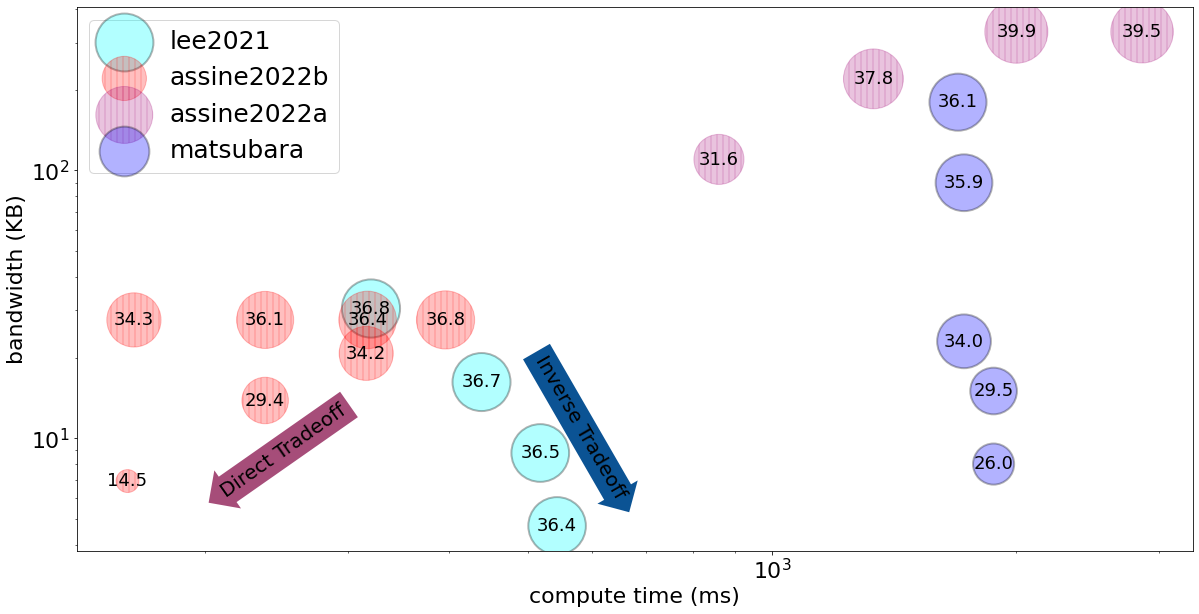

In [24]:
import matplotlib
font = {'family' : 'normal', 'size'   : 22}
matplotlib.rc('font', **font)
import matplotlib.pyplot as plt

df = copy.copy(df_back)
###########################################################################
def plot(ax, name, color='blue', configurable=False):
    a = df[df.index.str.contains(name)]
    bw = a['bw(KB)'].values
    latency = a['inference_time'].values*1000
    mAP = a['map'].values
    
    z = 2.5*(mAP**2)
    z_label = ["{:2.1f}".format(m) for m in mAP]
    if configurable:
         ax.scatter(latency, bw, s=z, marker='o', color=color, alpha=0.25, 
                    label=name, hatch='||')#, hatch='||') #, edgecolor=color, linewidth=4
    else:
        ax.scatter(latency, bw, s=z, marker='o', color=color, alpha=0.3,
                   edgecolor='black', linewidth=2, label=name)
    for i in range(len(mAP)):
        ax.annotate(z_label[i], ( latency[i], bw[i]), ha='center', va='center', fontsize=18, color='black')



fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.set_xlabel('compute time (ms)')
ax.set_ylabel('bandwidth (KB)')
ax.set_xscale('log')
ax.set_yscale('log')

f = "literature_comparison/literature.csv"
df.columns = df.columns.str.replace(' ', '')
plot(ax, "lee2021", color='cyan')
plot(ax, "assine2022b", color='red', configurable=True)
plot(ax, "assine2022a", color="#A8127D", configurable=True)
plot(ax, "matsubara", color='blue')

# plot("assine", color='black',  configurable=True)

# bb = t.get_bbox_patch()
# bb.set_boxstyle("rarrow", pad=0.6)



# bbox_props = dict(boxstyle="rarrow", fc=(0.7, 0.1, 0.1), ec="b", lw=0)
bbox_props = dict(boxstyle="rarrow", fc="#0b5394", ec="b", lw=0)
t = ax.text(580, 1.1e1, "Inverse Tradeoff", ha="center", va="center", rotation=-60,
            size=20,
            bbox=bbox_props)

# bbox_props = dict(boxstyle="larrow", fc=(0.1, 0.1, 0.7), ec="b", lw=0)
# t = ax.text(210, 9, "Direct Tradeoff", ha="center", va="center", rotation=40,
#             size=18,
#             bbox=bbox_props)
bbox_props = dict(boxstyle="larrow", fc="#a64d79", ec="b", lw=0)
t = ax.text(250, 9, "Direct Tradeoff", ha="center", va="center", rotation=35,
            size=20,
            bbox=bbox_props)

legend_properties = {'weight':'bold', 'size': 16}
legend_properties = {'size': 25}
ax.legend(fontsize=15,  prop=legend_properties, loc='upper left',)#bbox_to_anchor=(0.1, 0.6),
# plt.savefig(os.path.join("./out", "graph_sota.pdf"))
plt.show()
